In [70]:
import numpy as np
import pandas as pd
import importlib as imp
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D

from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib import rcParams

import titanic_util as tu
tu = imp.reload(tu)

In [8]:
%matplotlib inline
rcParams['figure.figsize'] = 6,5

In [9]:
titanic_data = tu.load(opt='train')

attaching_keys=['Sex','Age','Fare','Pclass','Embarked','SibSp','Parch']#,np.array(['Parch','SibSp'])]

new_data, data_targets = tu.mung(titanic_data, attaching_keys, base_truth='Survived')

# display(titanic_data.head())
# display(new_data.head())

[[-0.15515019  0.02759091]
 [-0.22108594 -0.12889288]
 [-0.45731919 -0.05422731]
 [-0.52713813 -0.0808766 ]
 [ 0.0281039  -0.42671161]
 [ 0.43131211  0.4169657 ]
 [-0.39524159  0.33867372]
 [ 0.0903652   0.42668989]
 [ 0.29402756 -0.56388222]
 [ 0.0362347  -0.00070438]
 [-0.0326659  -0.04972664]]


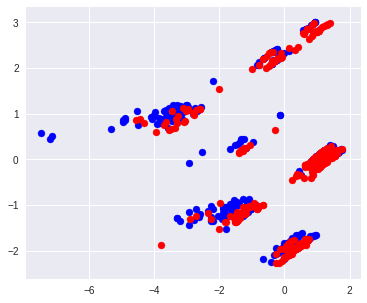

In [10]:
pca_vis = tu.PCA(task_type='reduce_dim', pc_count=2)
reduced_data = pca_vis.fit(new_data)

reduced_data = DataFrame(reduced_data); reduced_data.index = new_data.index

who_lives = reduced_data.loc[data_targets==1]
who_dies = reduced_data.loc[data_targets==0]

plt.scatter(who_lives.iloc[:,0], who_lives.iloc[:,1], color='b')
plt.scatter(who_dies.iloc[:,0], who_dies.iloc[:,1], color='r')
plt.show()

[[-0.15515019  0.02759091  0.32685603]
 [-0.22108594 -0.12889288 -0.37007565]
 [-0.45731919 -0.05422731  0.24422089]
 [-0.52713813 -0.0808766  -0.0342702 ]
 [ 0.0281039  -0.42671161 -0.07236304]
 [ 0.43131211  0.4169657   0.08842051]
 [-0.39524159  0.33867372 -0.0263819 ]
 [ 0.0903652   0.42668989 -0.07846995]
 [ 0.29402756 -0.56388222  0.07417317]
 [ 0.0362347  -0.00070438  0.5670784 ]
 [-0.0326659  -0.04972664  0.59025686]]


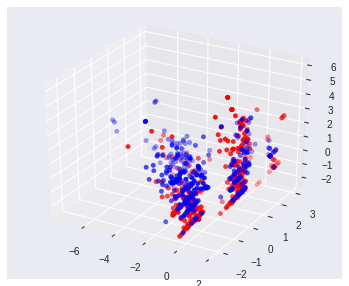

In [11]:
#TODO plot in 3-D as well

pca_vis = tu.PCA(task_type='reduce_dim', pc_count=3)
reduced_data = pca_vis.fit(new_data)

reduced_data = DataFrame(reduced_data); reduced_data.index = new_data.index

who_lives = reduced_data.loc[data_targets==1]
who_dies = reduced_data.loc[data_targets==0]

xlive = np.array(who_lives.iloc[:,0])
ylive = np.array(who_lives.iloc[:,1])
zlive = np.array(who_lives.iloc[:,2])

xdie = np.array(who_dies.iloc[:,0])
ydie = np.array(who_dies.iloc[:,1])
zdie = np.array(who_dies.iloc[:,2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xlive, ylive, zlive, color='b')
ax.scatter(xdie, ydie, zdie, color='r')
plt.show()

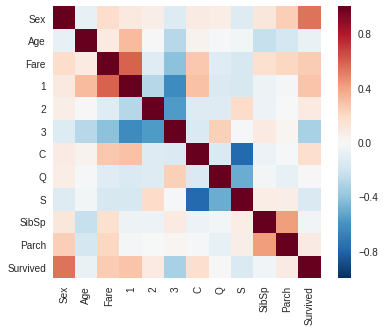

In [12]:
corr = new_data.join(titanic_data['Survived']).corr()

display(sb.heatmap(corr))

In [27]:
#Try clustering, then running a regression on each cluster; data seems to break down into 3 groups

log_reg = tu.LogisticRegressor(max_it=5000, lambd=0.3, alpha=0.01, metric='f1_score')

theta, train_error, cv_error = log_reg.fit(new_data, data_targets, portion_train=0.7, return_errors=True, return_differences=True, display_cost_log=True)

print('Training {} was {}'.format(log_reg.metric, 1 - train_error))
print('Cross-validation {} was {}'.format(log_reg.metric, 1 - cv_error))
print('Optimal weights are: \n{}'.format(theta))

converged after 298 iterations.


array([ 0.34657359,  0.34579096,  0.34501625, ...,  0.        ,
        0.        ,  0.        ])

,mean_overall,mean_misclass,std_overall,std_misclass
Sex,0.011581,0.123366,1.004311,1.033724
Age,-0.001553,-0.042971,0.982983,1.063325
Fare,0.020690,0.138473,1.013537,0.968131
1,0.011123,0.162484,1.007411,1.085020
2,-0.030356,-0.247348,0.978058,0.764392
3,0.015122,0.061309,0.999134,0.995328
C,0.010390,0.134430,1.008996,1.097518
Q,-0.027646,-0.004674,0.958815,0.996626
S,0.009703,-0.109522,0.995911,1.051123
SibSp,0.025001,0.214003,0.985754,1.152308


,mean_overall,mean_misclass,std_overall,std_misclass
Sex,-0.026921,-0.019110,0.993137,1.001396
Age,0.003610,0.011600,1.042152,1.196055
Fare,-0.048096,-0.053319,0.969882,0.758238
1,-0.025857,0.096040,0.985838,1.059710
2,0.070566,-0.104571,1.049502,0.922019
3,-0.035152,0.002358,1.004863,1.007301
C,-0.024154,0.204791,0.982116,1.141771
Q,0.064267,-0.254444,1.090641,0.434793
S,-0.022556,-0.014221,1.012804,1.014552
SibSp,-0.058117,0.012980,1.033703,1.236924


Training f1_score was 0.738404452690167
Cross-validation f1_score was 0.6968325791855203
Optimal weights are: 
0     0.529060
1    -0.105986
2     0.159757
3     0.215693
4     0.079275
5    -0.250360
6     0.120253
7     0.002653
8    -0.111768
9    -0.043908
10    0.037639
dtype: float64


In [14]:
weights, train_error_curve, cv_error_curve = log_reg.learning_curves(new_data, data_targets, portion_train=0.8, step=10)

converged after 411 iterations.
Run with set of size 10 successful.
converged after 543 iterations.
Run with set of size 20 successful.
converged after 401 iterations.
Run with set of size 30 successful.
converged after 291 iterations.


/home/ckoehler/Dropbox/Education/Coding/Kaggle/titanic/titanic_util.py:218: RuntimeWarning: invalid value encountered in double_scalars
  return 2*prec*rec / (prec + rec)


Run with set of size 40 successful.
converged after 345 iterations.
Run with set of size 50 successful.
converged after 384 iterations.
Run with set of size 60 successful.
converged after 263 iterations.
Run with set of size 70 successful.
converged after 321 iterations.
Run with set of size 80 successful.
converged after 382 iterations.
Run with set of size 90 successful.
converged after 455 iterations.
Run with set of size 100 successful.
converged after 330 iterations.
Run with set of size 110 successful.
converged after 384 iterations.
Run with set of size 120 successful.
converged after 297 iterations.
Run with set of size 130 successful.
converged after 338 iterations.
Run with set of size 140 successful.
converged after 367 iterations.
Run with set of size 150 successful.
converged after 305 iterations.
Run with set of size 160 successful.
converged after 363 iterations.
Run with set of size 170 successful.
converged after 346 iterations.
Run with set of size 180 successful.
con

In [15]:
testing_data = tu.load('test')

testing_data = tu.mung(testing_data, attaching_keys)

pred = log_reg.predict(testing_data, theta)

display(pred)

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
5      0.0
6      1.0
7      0.0
8      1.0
9      0.0
10     0.0
11     0.0
12     1.0
13     0.0
14     1.0
15     1.0
16     0.0
17     0.0
18     1.0
19     1.0
20     1.0
21     0.0
22     1.0
23     1.0
24     1.0
25     0.0
26     1.0
27     0.0
28     0.0
29     0.0
      ... 
388    0.0
389    0.0
390    1.0
391    1.0
392    0.0
393    0.0
394    0.0
395    1.0
396    0.0
397    1.0
398    0.0
399    0.0
400    1.0
401    0.0
402    1.0
403    1.0
404    1.0
405    1.0
406    0.0
407    1.0
408    1.0
409    1.0
410    1.0
411    1.0
412    1.0
413    0.0
414    1.0
415    0.0
416    0.0
417    0.0
Length: 418, dtype: float64

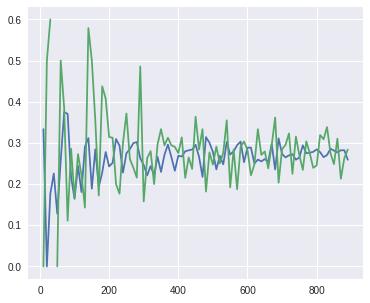

In [16]:
plt.plot(np.fromiter(train_error_curve.keys(), dtype=int), np.fromiter(train_error_curve.values(), dtype=float))
plt.plot(np.fromiter(cv_error_curve.keys(), dtype=int), np.fromiter(cv_error_curve.values(), dtype=float))
plt.show()

In [76]:
log_reg_ensemble = tu.VotingEnsemble(log_reg)

ensemble_params, weights = log_reg_ensemble.fit(new_data, data_targets, weighted=True)

predictions = log_reg_ensemble.predict(new_data, ensemble_params, weights=weights, avg_type='geometric')

display(1 - log_reg_ensemble.get_error(new_data, data_targets, predictions, metric='f1_score'))

converged after 298 iterations.
converged after 298 iterations.
converged after 291 iterations.


0.72509960159362552